## Fuel  Year to  Year  Transition Analysis

The purpose of this analysis is to see how the fuel  in Escondido changes from year to year.

* [Executive Summary](#Executive-Summary)
* [Tile Changes Over Time](#Tile-Changes-Over-Time)
* [2010 to 2012 Transition Analysis](#Transition-Analysis-for-2010-to-2012)
* [2012 to 2014 Transition Analysis](#Transition-Analysis-For-2012-to-2014)

# Executive Summary

In [117]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
import seaborn as sns
%matplotlib inline

In [2]:
def ImportXYZ(FileName,labelName):
    DF=pd.read_table(FileName, header=None)
    DF.columns=['Row']
    DF["Eastern"]=DF["Row"].apply(lambda x: float(x.split(" ")[0]))
    DF["Northern"]=DF["Row"].apply(lambda x: float(x.split(" ")[1]))
    DF[labelName]=DF["Row"].apply(lambda x: x.split(" ")[2])
    del DF["Row"]
    return DF

In [5]:
clip='~/WIFIRE/Data_Prep_Work_Flow/Clipped_Files/'

#Import Fuel
Fuel2010=ImportXYZ(clip+'Fuel2010_Escondido_UTM.xyz','Fuel2010')
Fuel2012=ImportXYZ(clip+'Fuel2012_Escondido_UTM.xyz','Fuel2012')
Fuel2014=ImportXYZ(clip+'Fuel2014_Escondido_UTM.xyz','Fuel2014')

#Combine Fuel data
Fuel=pd.merge(pd.merge(Fuel2010,Fuel2012,on=['Eastern','Northern']),Fuel2014,on=['Eastern','Northern'])

print(Fuel2010.shape)
print(Fuel2012.shape)
print(Fuel2014.shape)
print(Fuel.shape)

Fuel.head()

(154671, 3)
(154671, 3)
(154671, 3)
(154671, 5)


,Eastern,Northern,Fuel2010,Fuel2012,Fuel2014
0,480802.714908,3.667607e+06,5,1,5
1,480832.704725,3.667607e+06,1,1,1
2,480862.694541,3.667607e+06,91,91,91
3,480892.684358,3.667607e+06,91,91,91
4,480922.674174,3.667607e+06,91,91,2


In [7]:
Hold=[]
for index, row in Fuel.iterrows():
    if row["Fuel2010"]!=row["Fuel2012"]:
        a=(row["Fuel2010"],row["Fuel2012"])
        d=1
    else:
        a=np.nan
        d=0
    if row["Fuel2012"]!=row["Fuel2014"]:
        b=(row["Fuel2012"],row["Fuel2014"])
        d+=1
    else:
        b=np.nan
        d+=0
    if d>0 :
        c=(row["Fuel2010"],row["Fuel2012"],row["Fuel2014"])
    else:
        c=np.nan
    Hold.append([a,b,c])
    
H=pd.DataFrame(Hold, columns=["Tran10-12","Tran12-14","Tran10-12-14"])

In [8]:
print (Fuel.shape)
Fuel=pd.concat([Fuel,H],axis=1)
print (Fuel.shape)

(154671, 5)
(154671, 8)


In [9]:
# What percentage did NOT change?
print ("2010 to 2012: ",Fuel[Fuel["Tran10-12"].isnull()].shape[0]/Fuel.shape[0])
print ("2012 to 2014: ",Fuel[Fuel["Tran12-14"].isnull()].shape[0]/Fuel.shape[0])
print ("2010 to 2012 to 2014: ",Fuel[Fuel["Tran10-12-14"].isnull()].shape[0]/Fuel.shape[0])

('2010 to 2012: ', 0)
('2012 to 2014: ', 0)
('2010 to 2012 to 2014: ', 0)


In [11]:
#What percentage changed back?
def RevertBack(t):
    if isinstance(t,tuple):
        if t[0]==t[2]:
            return t[0]
        else:
            return np.nan
    else:
        return np.nan
Fuel["Reverted"]=Fuel['Tran10-12-14'].apply(lambda x: RevertBack(x))
print("Changed from 2010 to 2012, then Changed Back 2014:",Fuel[Fuel["Reverted"].isnull()==False].shape[0]/Fuel.shape[0])

('Changed from 2010 to 2012, then Changed Back 2014:', 0)


In [12]:
Revert=Fuel.groupby(["Reverted","Fuel2012"])["Eastern"].count().reset_index()
Revert.columns=["Fuel2010&2014","Fuel2012","Count"]
Revert.head()

,Fuel2010&2014,Fuel2012,Count
0,1,2,363
1,1,5,241
2,1,8,31
3,1,9,48
4,1,91,404


In [14]:
#Import Fuel "decoder ring"
DecodeFuel=pd.read_csv('~/WIFIRE/Data_labels/fuel_labels.csv')
DecodeFuel.columns=["filename",'id','fuelLabel']
DecodeFuel["id"]=DecodeFuel["id"].apply(lambda x: str(x))
DecodeFuel

,filename,id,fuelLabel
0,FBFM1,1,Short Grass
1,FBFM2,2,Timber Grass
2,FBFM3,3,Tall Grass
3,FBFM4,4,Chaparral
4,FBFM5,5,Brush
5,FBFM6,6,Dormant Brush
6,FBFM7,7,Southern Rough
7,FBFM8,8,Compact Timber Litter
8,FBFM9,9,Hardwood Litter
9,FBFM10,10,Timber Understory


In [15]:
Revert=pd.merge(pd.merge(Revert,DecodeFuel[["id","fuelLabel"]],left_on="Fuel2010&2014",right_on="id",how='inner'),DecodeFuel[["id","fuelLabel"]],left_on='Fuel2012',right_on='id',how='inner')
Revert.columns=["Fuel2010&2014","Fuel2012","Count","id_x","Label10&14","id_y","Label12"]
Revert[["Fuel2010&2014","Fuel2012","Count","Label10&14","Label12"]].to_csv('RevertedFuel.csv',index=False)
Revert.head()

,Fuel2010&2014,Fuel2012,Count,id_x,Label10&14,id_y,Label12
0,1,2,363,1,Short Grass,2,Timber Grass
1,5,2,351,5,Brush,2,Timber Grass
2,8,2,147,8,Compact Timber Litter,2,Timber Grass
3,9,2,57,9,Hardwood Litter,2,Timber Grass
4,91,2,364,91,Urban,2,Timber Grass


These "Reverted" fuel labels are potential mislabels.  I sent them to CSV so that we can discuss with advisors.  At first look,  I would guess those  labels  in 2010 & 2014 that were Water but something else in 2012 were mislabelled in 2012

# Tile Changes Over Time

In [227]:
print "2010-2012 Tiles That Stayed The Same:", len(Fuel.loc[Fuel['Fuel2010'] == Fuel['Fuel2012']])
print "2012-2014 Tiles That Stayed The Same:",len(Fuel.loc[Fuel['Fuel2012'] == Fuel['Fuel2014']])
print "2010-2012 Tiles That Changed:", len(Fuel.loc[Fuel['Fuel2010'] != Fuel['Fuel2012']])
print "2012-2014 Tiles That Changed:", len(Fuel.loc[Fuel['Fuel2012'] != Fuel['Fuel2014']])
fueldiff10_12 = Fuel.loc[Fuel['Fuel2010'] != Fuel['Fuel2012']]
fueldiff12_14 = Fuel.loc[Fuel['Fuel2012'] != Fuel['Fuel2014']]

2010-2012 Tiles That Stayed The Same: 147783
2012-2014 Tiles That Stayed The Same: 118508
2010-2012 Tiles That Changed: 6888
2012-2014 Tiles That Changed: 36163


In [230]:
ls_labels = Fuel.loc[Fuel['Fuel2010'] != Fuel['Fuel2012']].Fuel2010.unique()
print ls_labels

['5' '1' '2' '91' '8' '9' '99' '93' '98' '4' '7' '6']


In [231]:
sum_diff10_12 = fueldiff10_12.groupby(['Fuel2010', 'Fuel2012']).size().rename('Count_Pixel').reset_index()
sum_diff12_14 = fueldiff12_14.groupby(['Fuel2012', 'Fuel2014']).size().rename('Count_Pixel').reset_index() 

In [236]:
DecodeFuel[['id','fuelLabel']]

,id,fuelLabel
0,1,Short Grass
1,2,Timber Grass
2,3,Tall Grass
3,4,Chaparral
4,5,Brush
5,6,Dormant Brush
6,7,Southern Rough
7,8,Compact Timber Litter
8,9,Hardwood Litter
9,10,Timber Understory


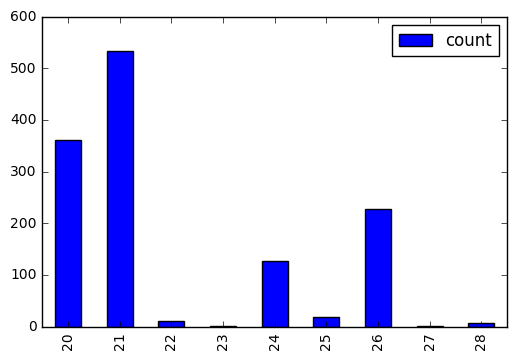

In [113]:
diff10_12[diff10_12['Fuel2010'] == '5'].plot(kind='bar')

# Transition Analysis for 2010 to 2012

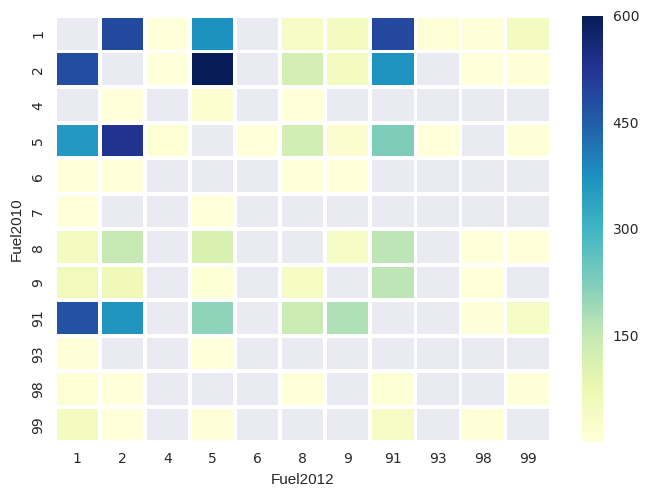

In [224]:
crosstab10_12 = pd.crosstab(diff10_12.Fuel2010, diff10_12.Fuel2012, values=diff10_12.Count_Pixel, 
            aggfunc=np.sum)
ax = sns.heatmap(crosstab10_12,  linewidths=2, cmap="YlGnBu")

# Transition Analysis For 2012 to 2014

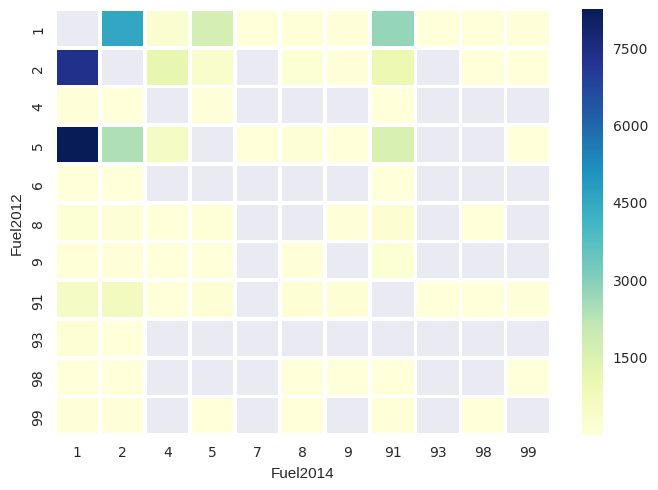

In [234]:
crosstab12_14 = pd.crosstab(sum_diff12_14.Fuel2012, sum_diff12_14.Fuel2014, values=sum_diff12_14.Count_Pixel, 
            aggfunc=np.sum)
ax = sns.heatmap(crosstab12_14,  linewidths=2, cmap="YlGnBu")